In [2]:
#neural network import

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import DataLoader
from torchvision import datasets, io, models, ops, transforms, utils

In [3]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#read in two classes of images from the folders
PATH = r"Data"
IMG_CLASS = ['NORMAL', 'PNEUMONIA'] 

def load_sample_imgs(path):
    imgs = []
    for cls in IMG_CLASS:
        dir_path = os.path.join(path, cls)
        img_name = os.listdir(dir_path)[0]
        img = cv2.imread(os.path.join(dir_path, img_name))
        cls_index = IMG_CLASS.index(cls)
        imgs.append([img, cls_index])
    
    return imgs

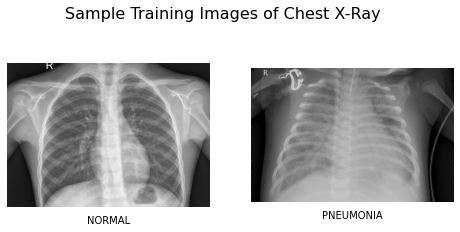

In [10]:
sample_imgs = load_sample_imgs(os.path.join(PATH, 'train'))
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))

plt.suptitle('Sample Training Images of Chest X-Ray', fontsize=16, y=0.95)

for index in range(2):
    img, cls_index = sample_imgs[index]
    ax[index].imshow(img)
    ax[index].set_xticks([])             
    ax[index].set_yticks([])
    ax[index].set_xlabel(IMG_CLASS[cls_index])
    ax[index].spines['top'].set_visible(False)
    ax[index].spines['right'].set_visible(False)        
    ax[index].spines['left'].set_visible(False)                
    ax[index].spines['bottom'].set_visible(False)                

plt.show()

In [ ]:
# need to establish train test split here. 
# Parameters
params = {'batch_size': 64,
          'shuffle': True,
          'num_workers': 6}
max_epochs = 100

# Datasets
partition = # IDs
labels = # Labels


In [3]:
# define transforms to apply to the images
transform = transforms.Compose([  
    transforms.Resize(256),    
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.RandomRotation(degrees=5), #Just rotate the image for just a little bit o account for the image orientations
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize the image using the ImageNet mean and standard deviation
])

# create a dataset object
train_dataset = datasets.ImageFolder(root=r'C:\Users\Bruce\Desktop\261final\Data\train', transform=transform)

# create a data loader object to iterate over batches of data

dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


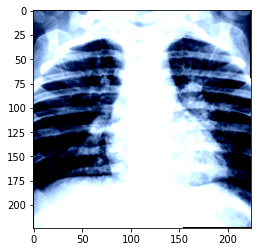

In [4]:
for i, a in dataloader: 
    tmp = i[0]
    tmp = torch.permute(tmp, (1,2,0))
    plt.imshow(tmp)
    break
   

In [5]:
num_class = 1

#construct a neural network base on VGG 16. 
pneCNN = models.vgg16(weights=VGG16_Weights.DEFAULT)

#freeze training on the VGG parameters
for param in pneCNN.features.parameters():
    param.require_grad = False

C:\Users\Bruce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Bruce\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
vgg16 = models.vgg16(pretrained=True)

# Freeze training for all layers
for param in vgg16.features.parameters():
    param.require_grad = False

# Newly created modules have require_grad=True by default
num_features = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1] # Remove last layer
features.extend([nn.Linear(num_features, 1)]) # Add our layer with 4 outputs
vgg16.classifier = nn.Sequential(*features) # Replace the model classifier
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:

# Set the device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(vgg16.parameters(), lr=0.001, momentum=0.9)

# Load the data
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


In [8]:
m = nn.Sigmoid()

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()

        outputs = m(vgg16(images))
        outputs = torch.reshape(outputs, (-1,))
        
        #convert long datatype to float
        outputs = outputs.to(torch.float32)
        labels = labels.to(torch.float32)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/10], Loss: 0.0796
Epoch [2/10], Loss: 0.1383
Epoch [3/10], Loss: 0.0329
Epoch [4/10], Loss: 0.0600
Epoch [5/10], Loss: 0.0121
Epoch [6/10], Loss: 0.0350
Epoch [7/10], Loss: 0.0732
Epoch [8/10], Loss: 0.0394
Epoch [9/10], Loss: 0.1270
Epoch [10/10], Loss: 0.1184


In [9]:
# Define the transformations to be applied
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the test data
test_dataset = datasets.ImageFolder(root=r'C:\Users\Bruce\Desktop\261final\Data\test', transform=transform)

# Create a DataLoader for the test data
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=32,
    shuffle=False
)

FileNotFoundError: Couldn't find any class folder in C:\Users\Bruce\Desktop\261final\Data\test.

In [ ]:
vgg16.eval()

# Create an empty list to store the predictions
predictions = []

# Loop through the test data
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        outputs = m(outputs)
        predictions.append(outputs)